![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/graph_ai_summit/Healthcare_Graph_NLU_COVID_Tigergraph.ipynb)


<div>
<img src="http://ckl-it.de/wp-content/uploads/2021/04/WhatsApp-Image-2021-04-19-at-7.35.04-AM.jpeg" width="400"  height="250" >
</div>



# Graph NLU 20 Minutes Crashcourse - State of the Art Text Mining for Graphs
This notebook is used to feed the `Tiger Graph` engine with features derived by `John Snow Labs` python `NLU` library
This short notebook will teach you a lot of things!
- Sentiment classification, binary, multi class and regressive
- Extract Parts of Speech (POS)
- Extract Named Entities (NER)
- Extract Keywords (YAKE!)
- Answer Open and Closed book questions with T5
- Summarize text and more with Multi task T5
- Translate text with Microsofts Marian Model
- Train a Multi Lingual Classifier for 100+ languages from a dataset with just one language
- Extract Medical Named Entities (Medical NER)
- Resolve Medical Entities to codes
- Classify and extrat relations between entities
- 


## More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)

# Install NLU and authorize licensed enviroment
- Run the install script
- Upload your`spark_nlp_for_healthcare.json` 
- Have fun


#### Instructions for non Google Colab enviroment :
- [See the installation guide](https://nlu.johnsnowlabs.com/docs/en/install) and the [Autorization guide](TODO) for detailed instructions  
- If you need help or run into troubles, [ping us on slack :)](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA) 

In [1]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2022-04-15 11:54:27--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2022-04-15 11:54:28--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.4.3rc2 with  PySpark 3.0.3 and Spark NLP 3.4.2 for Google Colab .

# Simple NLU basics on Strings

## Context based spell Checking in 1 line

![Spell Check](https://i.imgflip.com/52wb7w.jpg)

In [2]:
import nlu 
nlu.load('spell').predict('I also liek to live dangertus')

spellcheck_dl download started this may take some time.
Approximate size to download 95.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,spell,token
0,I,I
0,also,also
0,like,liek
0,to,to
0,live,live
0,dangerous,dangertus


## Binary Sentiment classification in 1 Line
![Binary Sentiment](https://cdn.pixabay.com/photo/2015/11/13/10/07/smiley-1041796_960_720.jpg)


In [3]:
nlu.load('sentiment').predict('I love NLU and rainy days!')

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_sentence_embedding_converter,sentiment,sentiment_confidence,word_embedding_glove
0,I love NLU and rainy days!,"[0.015170135535299778, 0.3010264039039612, 0.3...",pos,0.999995,"[[-0.046539001166820526, 0.6196600198745728, 0..."


## Part of Speech (POS) in 1 line
![Parts of Speech](https://image.shutterstock.com/image-photo/blackboard-background-written-colorful-chalk-600w-1166166529.jpg)

|Tag |Description | Example|
|------|------------|------|
|CC| Coordinating conjunction | This batch of mushroom stew is savory **and** delicious    |
|CD| Cardinal number | Here are **five** coins    |
|DT| Determiner | **The** bunny went home    |
|EX| Existential there | **There** is a storm coming    |
|FW| Foreign word | I'm having a **déjà vu**    |
|IN| Preposition or subordinating conjunction | He is cleverer **than** I am   |
|JJ| Adjective | She wore a **beautiful** dress    |
|JJR| Adjective, comparative | My house is **bigger** than yours    |
|JJS| Adjective, superlative | I am the **shortest** person in my family   |
|LS| List item marker | A number of things need to be considered before starting a business **,** such as premises **,** finance **,** product demand **,** staffing and access to customers |
|MD| Modal | You **must** stop when the traffic lights turn red    |
|NN| Noun, singular or mass | The **dog** likes to run    |
|NNS| Noun, plural | The **cars** are fast    |
|NNP| Proper noun, singular | I ordered the chair from **Amazon**  |
|NNPS| Proper noun, plural | We visted the **Kennedys**   |
|PDT| Predeterminer | **Both** the children had a toy   |
|POS| Possessive ending | I built the dog'**s** house    |
|PRP| Personal pronoun | **You** need to stop    |
|PRP$| Possessive pronoun | Remember not to judge a book by **its** cover |
|RB| Adverb | The dog barks **loudly**    |
|RBR| Adverb, comparative | Could you sing more **quietly** please?   |
|RBS| Adverb, superlative | Everyone in the race ran fast, but John ran **the fastest** of all    |
|RP| Particle | He ate **up** all his dinner    |
|SYM| Symbol | What are you doing **?**    |
|TO| to | Please send it back **to** me    |
|UH| Interjection | **Wow!** You look gorgeous    |
|VB| Verb, base form | We **play** soccer |
|VBD| Verb, past tense | I **worked** at a restaurant    |
|VBG| Verb, gerund or present participle | **Smoking** kills people   |
|VBN| Verb, past participle | She has **done** her homework    |
|VBP| Verb, non-3rd person singular present | You **flit** from place to place    |
|VBZ| Verb, 3rd person singular present | He never **calls** me    |
|WDT| Wh-determiner | The store honored the complaints, **which** were less than 25 days old    |
|WP| Wh-pronoun | **Who** can help me?    |
|WP\$| Possessive wh-pronoun | **Whose** fault is it?    |
|WRB| Wh-adverb | **Where** are you going?  |

In [4]:
nlu.load('pos').predict('POS assigns each token in a sentence a grammatical label')

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,pos,token
0,NNP,POS
0,NNS,assigns
0,DT,each
0,NN,token
0,IN,in
0,DT,a
0,NN,sentence
0,DT,a
0,JJ,grammatical
0,NN,label


## Named Entity Recognition (NER) in 1 line

![NER](http://ckl-it.de/wp-content/uploads/2021/02/ner-1.png)

|Type | 	Description |
|------|--------------|
| PERSON | 	People, including fictional like **Harry Potter** |
| NORP | 	Nationalities or religious or political groups like the **Germans** |
| FAC | 	Buildings, airports, highways, bridges, etc. like **New York Airport** |
| ORG | 	Companies, agencies, institutions, etc. like **Microsoft** |
| GPE | 	Countries, cities, states. like **Germany** |
| LOC | 	Non-GPE locations, mountain ranges, bodies of water. Like the **Sahara desert**|
| PRODUCT | 	Objects, vehicles, foods, etc. (Not services.) like **playstation** |
| EVENT | 	Named hurricanes, battles, wars, sports events, etc. like **hurricane Katrina**|
| WORK_OF_ART | 	Titles of books, songs, etc. Like **Mona Lisa** |
| LAW | 	Named documents made into laws. Like : **Declaration of Independence** |
| LANGUAGE | 	Any named language. Like **Turkish**|
| DATE | 	Absolute or relative dates or periods. Like every second **friday**|
| TIME | 	Times smaller than a day. Like **every minute**|
| PERCENT | 	Percentage, including ”%“. Like **55%** of workers enjoy their work |
| MONEY | 	Monetary values, including unit. Like **50$** for those pants |
| QUANTITY | 	Measurements, as of weight or distance. Like this person weights **50kg** |
| ORDINAL | 	“first”, “second”, etc. Like David placed **first** in the tournament |
| CARDINAL | 	Numerals that do not fall under another type. Like **hundreds** of models are avaiable in NLU |


In [5]:
nlu.load('ner').predict("John Snow Labs congratulates the Amarican John Biden to winning the American election!", output_level='chunk')

onto_recognize_entities_sm download started this may take some time.
Approx size to download 160.1 MB
[OK!]


,document,entities_ner,entities_ner_class,entities_ner_confidence,word_embedding_ner
0,John Snow Labs congratulates the Amarican John...,John Snow Labs,PERSON,0.8046667,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,the Amarican,PERSON,0.46429998,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,John Biden,PERSON,0.83775,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,American,NORP,0.9877,"[[-0.2747400104999542, 0.48680999875068665, -0..."


# Let's apply NLU to a COVID dataset!


<div>
    <img src="http://ckl-it.de/wp-content/uploads/2021/04/WhatsApp-Image-2021-04-19-at-7.35.04-AM-1.jpeg" width="600"  height="450" >
    </div>

In [6]:
! wget http://ckl-it.de/wp-content/uploads/2021/04/covid19_tweets.csv
import pandas as pd
df = pd.read_csv('covid19_tweets.csv')
df

--2022-04-15 11:59:05--  http://ckl-it.de/wp-content/uploads/2021/04/covid19_tweets.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35085653 (33M) [text/csv]
Saving to: ‘covid19_tweets.csv’

covid19_tweets.csv  100%[===================>]  33.46M  12.8MB/s    in 2.6s    

2022-04-15 11:59:07 (12.8 MB/s) - ‘covid19_tweets.csv’ saved [35085653/35085653]



,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,Airdrop Distribution News,NaN,"Do simple social tasks for projects , grab fre...",2020-01-06 13:24:15,226,994,307,False,2020-08-08 10:22:11,👇work 1min &amp; get free 5.5$ coin👇\n\nZelf A...,NaN,Twitter for Android,False
89996,89996,Malcolm Montgomery #WallOfVets,NaN,#DEMS #TheResistance #VetsResistSquadron #Vets...,2014-05-23 13:53:59,84046,72631,26916,False,2020-08-08 10:22:06,@Anons_daddyO @psime @WeeksNoah @ljvilardo @un...,NaN,Twitter Web App,False
89997,89997,PhatzNewsRoom,North America,"Breaking News, News, Music, Sports, Politics, ...",2010-11-27 15:34:06,6845,994,28801,False,2020-08-08 10:22:05,"Is France helping Lebanon, or trying to reconq...","['BreakingNews', 'Lebanon', 'Beirut', 'PMHassa...",Twitter Web App,False
89998,89998,B&NES Council,BA1 5AW,Bath & North East Somerset Council account; wi...,2009-06-19 10:59:31,20114,8967,1906,True,2020-08-08 10:21:59,"Extra weight puts extra pressure on your body,...",NaN,CrowdControlHQ,False


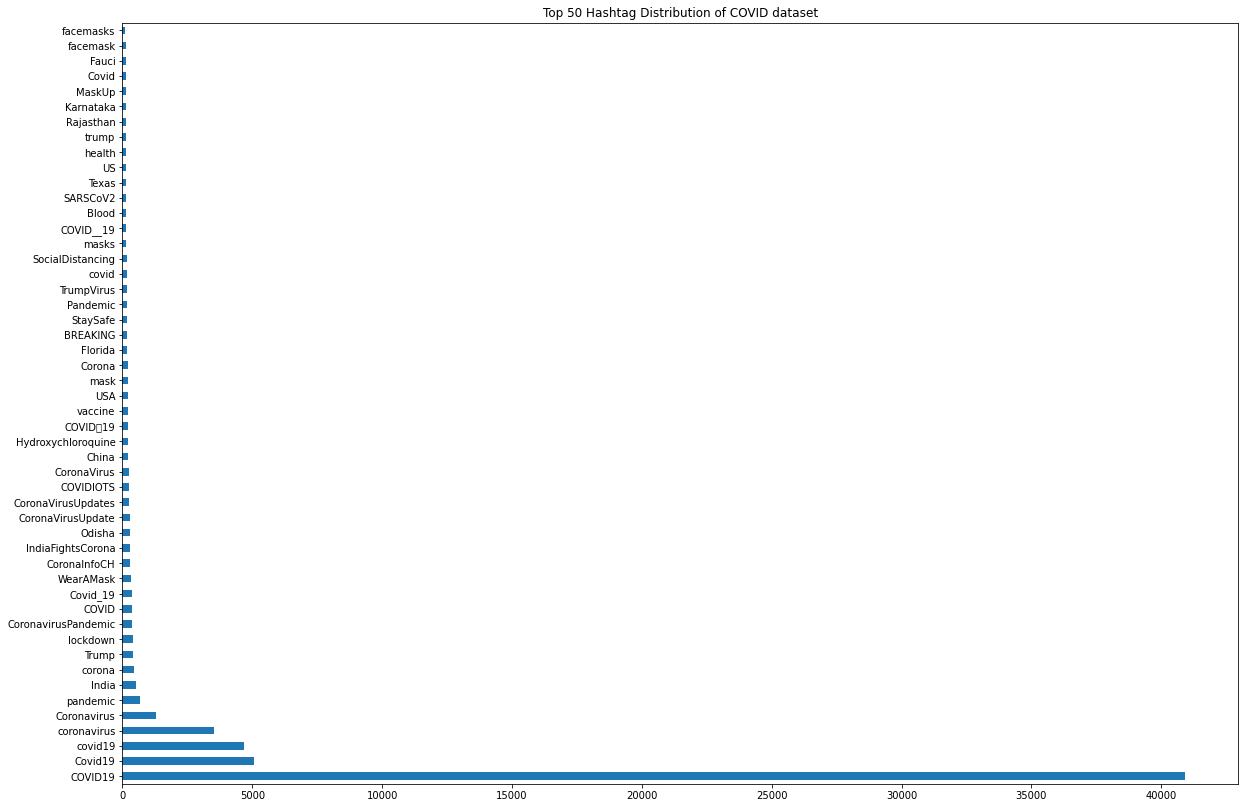

In [10]:
df.hashtags = df.hashtags.astype(str)
df["hashtags"][(df["hashtags"] != "nan")].apply(eval).explode().value_counts()[:50].plot.barh(figsize=(20,14), title='Top 50 Hashtag Distribution of COVID dataset')


## General NER on a COVID News dataset
### The **NER** model which you can load via `nlu.load('ner')` recognizes 18 different classes in your dataset.
We set output level to chunk, so that we get 1 row per NER class.


#### Predicted entities:


NER is avaiable in many languages, which you can [find in the John Snow Labs Modelshub](https://nlp.johnsnowlabs.com/models)

In [11]:
ner_df = nlu.load('ner').predict(df, output_level = 'chunk')
ner_df 

onto_recognize_entities_sm download started this may take some time.
Approx size to download 160.1 MB
[OK!]


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 49716)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1212, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py

No accepted Data type or usable columns found or applying the NLU models failed. 
Make sure that the first column you pass to .predict() is the one that nlu should predict on OR rename the column you want to predict on to 'text'  
On try to reset restart Jupyter session and run the setup script again, you might have used too much memory
Full Stacktrace was (<class 'py4j.protocol.Py4JError'>, Py4JError('An error occurred while calling o2740.schema'), <traceback object at 0x7f2a8c8b0f50>)
Additional info:
<class 'py4j.protocol.Py4JError'> predict_helper.py 172
An error occurred while calling o2740.schema
Stuck? Contact us on Slack! https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA


Exception: ignored

### Top 50 Named Entities

In [ ]:
ner_df['entities@ner_results'].value_counts()[:100].plot.barh(figsize = (16,20))

### Top 50 Named Entities which are Countries/Cities/States

In [ ]:

ner_df[ner_df['meta_entities@ner_entity'] == 'GPE']['entities@ner_results'].value_counts()[:50].plot.barh(figsize=(18,20), title ='Top 50 Occuring Countries/Cities/States in the dataset')

### Top 50 Named Entities which are PRODUCTS 

In [ ]:
ner_df[ner_df['meta_entities@ner_entity'] == 'PRODUCT']['entities@ner_results'].value_counts()[:50].plot.barh(figsize=(18,20), title ='Top 50 Occuring products in the dataset')

In [ ]:
ner_df[ner_df['meta_entities@ner_entity'] == 'ORG']['entities@ner_results'].value_counts()[:50].plot.barh(figsize=(18,20), title ='Top 50 products occuring in the dataset')

## YAKE on COVID Tweet dataset
### The **YAKE!** model (Yet Another Keyword Extractor) is a **unsupervised** keyword extraction algorithm.
You can load it via   which you can load via `nlu.load('yake')`. It has no weights and is very fast.
It has various parameters that can be configured to influence which keywords are beeing extracted, [here for an more indepth YAKE guide](https://github.com/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/1_NLU_base_features_on_dataset_with_YAKE_Lemma_Stemm_classifiers_NER_.ipynb)

In [ ]:
yake_df = nlu.load('yake').predict(df.text)
yake_df

### Top 50 extracted Keywords with YAKE!

In [ ]:
yake_df.explode('keywords_results').keywords_results.value_counts()[:50].plot.barh(title='Keyword Distribution in COVID twitter dataset', figsize = (16,20) )

## Binary Sentimental Analysis and Distribution on a dataset

In [ ]:
df = pd.read_csv('covid19_tweets.csv').fillna('na').iloc[:5000]

sent_df = nlu.load('sentiment').predict(df)
sent_df

In [ ]:
sent_df.sentiment_results.value_counts().plot.bar(title='Sentiment distribution')

## Emotional Analysis and Distribution of Headlines 

In [ ]:
emo_df = nlu.load('emotion').predict(df)

emo_df

In [ ]:
emo_df.category_results.value_counts().plot.bar(title='Emotion Distribution')


**Make sure to restart your notebook again** before starting the next section


In [ ]:
print("Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back")
1+'wait'


# Let's apply some medical models to the COVID dataset!


## Medical Named Entitiy recognition
The medical named entity recognizers are pretrained to extract various `medical` named entities. 
Here are the medical classes it predicts : 

` Kidney_Disease, HDL, Diet, Test, Imaging_Technique, Triglycerides, Obesity, Duration, Weight, Social_History_Header, ImagingTest, Labour_Delivery, Disease_Syndrome_Disorder, Communicable_Disease, Overweight, Units, Smoking, Score, Substance_Quantity, Form, Race_Ethnicity, Modifier, Hyperlipidemia, ImagingFindings, Psychological_Condition, OtherFindings, Cerebrovascular_Disease, Date, Test_Result, VS_Finding, Employment, Death_Entity, Gender, Oncological, Heart_Disease, Medical_Device, Total_Cholesterol, ManualFix, Time, Route, Pulse, Admission_Discharge, RelativeDate, O2_Saturation, Frequency, RelativeTime, Hypertension, Alcohol, Allergen, Fetus_NewBorn, Birth_Entity, Age, Respiration, Medical_History_Header, Oxygen_Therapy, Section_Header, LDL, Treatment, Vital_Signs_Header, Direction, BMI, Pregnancy, Sexually_Active_or_Sexual_Orientation, Symptom, Clinical_Dept, Measurements, Height, Family_History_Header, Substance, Strength, Injury_or_Poisoning, Relationship_Status, Blood_Pressure, Drug, Temperature, EKG_Findings, Diabetes, BodyPart, Vaccine, Procedure, Dosage` 

In [ ]:
import pandas as pd 
import nlu
df = pd.read_csv('covid19_tweets.csv').fillna('na')
vac_names = ['vaccine', 'Pfizer', 'BioNTech','Sinopharm','Sinovac','Moderna','Oxford', 'AstraZeneca','Covaxin','SputnikV']#,

r = "|".join(vac_names)
f_d = df.fillna('na')[df.fillna('na').hashtags.str.contains(r ,flags=re.IGNORECASE, regex=True)]

disease_df = nlu.load('med_ner.jsl.wip.clinical').predict(f_d.text.iloc[:2000], output_level='chunk',drop_irrelevant_cols=False)

disease_df 




In [ ]:
disease_df['meta_entities@clinical_entity'].value_counts().plot.barh(figsize=(20,14),title='Distribution of predicted medical entity labels  ')

### Top 50 **named Entities of type vacine** found in the dataset

The Medical named entity recognizer extracted various entities and classified them as vaccine

In [ ]:
disease_df[disease_df['meta_entities@clinical_entity'] == 'Vaccine']['entities@clinical_results'].value_counts()[:50].plot.barh(figsize=(18,20), title ='Top 50 Occuring products in the dataset')

### Top 50 **named entities of type symptom** found in the dataset

The Medical named entity recognizer extracted various entities and classified them as vaccine

In [ ]:
disease_df[disease_df['meta_entities@clinical_entity'] == 'Symptom']['entities@clinical_results'].value_counts().plot.barh(figsize=(18,20), title ='Top 50 Occuring smpyoms in the dataset')

## Medical Entitiy resolution for `medcical procedures` 

 Let's mine the text data and extract relevant `procedures` and their `procedure icd 10 pcs codes` to understand what the twitter world is thinking about `treatment procedures` of COVID

For this we are filtering for tweets that conain `vaccine`

In [ ]:
vac_names = ['vaccine','Pfizer', 'BioNTech','Sinopharm','Sinovac','Moderna','Oxford', 'AstraZeneca','Covaxin','SputnikV']#,
symptoms = ['sick','cough','sore','fever', 'tired','diarrhoea','taste','smell','loss','rash','skin','breath','short','difficult','ventilator' ]
r = "|".join(symptoms + vac_names) 
f_d = df[df.text.str.contains(r ,flags=re.IGNORECASE, regex=True)]


# Extract COVID procedures
resolve_df = nlu.load('med_ner.jsl.wip.clinical resolve.icd10pcs').predict(f_d, output_level='sentence')
resolve_df

In [ ]:
resolve_df.sentence_resolution_results.value_counts()[:50]


### Top 50 medical proceduress resolved 




In [ ]:
resolve_df.sentence_resolution_results.value_counts()[:50].plot.barh(title='Top 50 resolved procedures', figsize=(16,20))

## Resolve Medical Symptoms

In [ ]:
import pandas as pd 
# java reset
! echo 2 |  update-alternatives --config java
! java -version
import nlu
import re
df = pd.read_csv('covid19_tweets.csv').fillna('na')



vac_names = ['vaccine','sick','cough','sore','fever','Pfizer', 'BioNTech','Sinopharm','Sinovac','Moderna','Oxford', 'AstraZeneca','Covaxin','SputnikV']
symptoms = ['sick','cough','sore','fever', 'tired','diarrhoea','taste','smell','loss','rash','skin','breath','short','difficult','ventilator' ]
r = "|".join(symptoms+vac_names) 
# f_d = df.fillna('na')[df.fillna('na').hashtags.str.contains(r ,flags=re.IGNORECASE, regex=True)]
f_d = df[df.text.str.contains(r ,flags=re.IGNORECASE, regex=True)]
f_d


resolve_df = nlu.load('med_ner.jsl.wip.clinical resolve.icd10cm').predict(f_d[:2000], output_level='sentence')
resolve_df

### Top 50 Medical symptoms

In [ ]:
resolve_df.sentence_resolution_results.value_counts()[:50].plot.barh(title='Top 50 resolved procedures', figsize=(16,20))

## Assert status of medical entities

In [ ]:

df = pd.read_csv('covid19_tweets.csv').fillna('na')

vac_names = ['vaccine','sick','cough','sore','fever','Pfizer', 'BioNTech','Sinopharm','Sinovac','Moderna','Oxford', 'AstraZeneca','Covaxin','SputnikV']
symptoms = ['sick','cough','sore','fever', 'tired','diarrhoea','taste','smell','loss','rash','skin','breath','short','difficult','ventilator' ]
r = "|".join(symptoms+vac_names) 
f_d = df[df.text.str.contains(r ,flags=re.IGNORECASE, regex=True)]
f_d

assert_df = nlu.load('med_ner.jsl.wip.clinical assert').predict(f_d[:2000], output_level='chunk')
assert_df

## Extract relation between entities

In [ ]:

import pandas as pd 
import nlu
import re
df = pd.read_csv('covid19_tweets.csv').fillna('na')

vac_names = ['vaccine','sick','cough','sore','fever','Pfizer', 'BioNTech','Sinopharm','Sinovac','Moderna','Oxford', 'AstraZeneca','Covaxin','SputnikV']
symptoms = ['sick','cough','sore','fever', 'tired','diarrhoea','taste','smell','loss','rash','skin','breath','short','difficult','ventilator' ]
r = "|".join(symptoms+vac_names) 
f_d = df[df.text.str.contains(r ,flags=re.IGNORECASE, regex=True)]
f_d


relation_df = nlu.load('med_ner.jsl.wip.clinical en.relation.bodypart.problem ').predict(f_d[:2000], output_level='relation')
relation_df


**Make sure to restart your notebook again** before starting the next section


In [ ]:
print("Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back")
1+'wait'


# Answer **Closed Book** and Open **Book Questions** with Google's T5!

<!-- [T5]() -->
![T5 GIF](https://1.bp.blogspot.com/-o4oiOExxq1s/Xk26XPC3haI/AAAAAAAAFU8/NBlvOWB84L0PTYy9TzZBaLf6fwPGJTR0QCLcBGAsYHQ/s1600/image3.gif)

You can load the **question answering** model with `nlu.load('en.t5')`

In [ ]:
# Load question answering T5 model
t5_closed_question = nlu.load('en.t5')

## Answer **Closed Book Questions**  
Closed book means that no additional context is given and the model must answer the question with the knowledge stored in it's weights

In [ ]:
t5_closed_question.predict("Who is president of Nigeria?")

In [ ]:
t5_closed_question.predict("What is the most common language in India?")

In [ ]:
t5_closed_question.predict("What is the capital of Germany?")

## Answer **Open Book Questions** 
These are questions where we give the model some additional context, that is used to answer the question

In [ ]:
t5_open_book = nlu.load('answer_question')

In [ ]:
context   = 'Peters last week was terrible! He had an accident and broke his leg while skiing!'
question1  = 'Why was peters week so bad?' 
question2  = 'How did peter broke his leg?' 

t5_open_book.predict([question1+context, question2 + context]) 

In [ ]:
# Ask T5 questions in the context of a News Article
question1 = 'Who is Jack ma?'
question2 = 'Who is founder of Alibaba Group?'
question3 = 'When did Jack Ma re-appear?'
question4 = 'How did Alibaba stocks react?'
question5 = 'Whom did Jack Ma meet?'
question6 = 'Who did Jack Ma hide from?'


# from https://www.bbc.com/news/business-55728338 
news_article_context = """ context:
Alibaba Group founder Jack Ma has made his first appearance since Chinese regulators cracked down on his business empire.
His absence had fuelled speculation over his whereabouts amid increasing official scrutiny of his businesses.
The billionaire met 100 rural teachers in China via a video meeting on Wednesday, according to local government media.
Alibaba shares surged 5% on Hong Kong's stock exchange on the news.
"""

questions = [
             question1+ news_article_context,
             question2+ news_article_context,
             question3+ news_article_context,
             question4+ news_article_context,
             question5+ news_article_context,
             question6+ news_article_context,]



In [ ]:
t5_open_book.predict(questions)

# Multi Problem T5 model for Summarization and more
The main T5 model was trained for over 20 tasks from the SQUAD/GLUE/SUPERGLUE datasets. See [this notebook](https://github.com/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/7_T5_SQUAD_GLUE_SUPER_GLUE_TASKS.ipynb) for a demo of all tasks 


# Overview of every task available with T5
[The T5 model](https://arxiv.org/pdf/1910.10683.pdf) is trained on various datasets for 17 different tasks which fall into 8 categories.



1. Text summarization
2. Question answering
3. Translation
4. Sentiment analysis
5. Natural Language inference
6. Coreference resolution
7. Sentence Completion
8. Word sense disambiguation

### Every T5 Task with explanation:
|Task Name | Explanation | 
|----------|--------------|
|[1.CoLA](https://nyu-mll.github.io/CoLA/)                   | Classify if a sentence is gramaticaly correct|
|[2.RTE](https://dl.acm.org/doi/10.1007/11736790_9)                    | Classify whether if a statement can be deducted from a sentence|
|[3.MNLI](https://arxiv.org/abs/1704.05426)                   | Classify for a hypothesis and premise whether they contradict or contradict each other or neither of both (3 class).|
|[4.MRPC](https://www.aclweb.org/anthology/I05-5002.pdf)                   | Classify whether a pair of sentences is a re-phrasing of each other (semantically equivalent)|
|[5.QNLI](https://arxiv.org/pdf/1804.07461.pdf)                   | Classify whether the answer to a question can be deducted from an answer candidate.|
|[6.QQP](https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)                    | Classify whether a pair of questions is a re-phrasing of each other (semantically equivalent)|
|[7.SST2](https://www.aclweb.org/anthology/D13-1170.pdf)                   | Classify the sentiment of a sentence as positive or negative|
|[8.STSB](https://www.aclweb.org/anthology/S17-2001/)                   | Classify the sentiment of a sentence on a scale from 1 to 5 (21 Sentiment classes)|
|[9.CB](https://ojs.ub.uni-konstanz.de/sub/index.php/sub/article/view/601)                     | Classify for a premise and a hypothesis whether they contradict each other or not (binary).|
|[10.COPA](https://www.aaai.org/ocs/index.php/SSS/SSS11/paper/view/2418/0)                   | Classify for a question, premise, and 2 choices which choice the correct choice is (binary).|
|[11.MultiRc](https://www.aclweb.org/anthology/N18-1023.pdf)                | Classify for a question, a paragraph of text, and an answer candidate, if the answer is correct (binary),|
|[12.WiC](https://arxiv.org/abs/1808.09121)                    | Classify for a pair of sentences and a disambigous word if the word has the same meaning in both sentences.|
|[13.WSC/DPR](https://www.aaai.org/ocs/index.php/KR/KR12/paper/view/4492/0)       | Predict for an ambiguous pronoun in a sentence what it is referring to.  |
|[14.Summarization](https://arxiv.org/abs/1506.03340)          | Summarize text into a shorter representation.|
|[15.SQuAD](https://arxiv.org/abs/1606.05250)                  | Answer a question for a given context.|
|[16.WMT1.](https://arxiv.org/abs/1706.03762)                  | Translate English to German|
|[17.WMT2.](https://arxiv.org/abs/1706.03762)                   | Translate English to French|
|[18.WMT3.](https://arxiv.org/abs/1706.03762)                   | Translate English to Romanian|



In [ ]:
# Load the Multi Task Model T5
t5_multi = nlu.load('en.t5.base')

In [ ]:
# https://www.reuters.com/article/instant-article/idCAKBN2AA2WF
text = """(Reuters) - Mastercard Inc said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year, joining a string of big-ticket firms that have pledged similar support.

The credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin and would soon accept it as a form of payment.

Asset manager BlackRock Inc and payments companies Square and PayPal have also recently backed cryptocurrencies.

Mastercard already offers customers cards that allow people to transact using their cryptocurrencies, although without going through its network.

"Doing this work will create a lot more possibilities for shoppers and merchants, allowing them to transact in an entirely new form of payment. This change may open merchants up to new customers who are already flocking to digital assets," Mastercard said. (mstr.cd/3tLaPZM)

Mastercard specified that not all cryptocurrencies will be supported on its network, adding that many of the hundreds of digital assets in circulation still need to tighten their compliance measures.

Many cryptocurrencies have struggled to win the trust of mainstream investors and the general public due to their speculative nature and potential for money laundering.
"""
t5_multi['t5'].setTask('summarize ') 
short = t5_multi.predict(text)
short

In [ ]:
print(f"Original Length {len(short.document.iloc[0])}   Summarized Length : {len(short.T5.iloc[0])} \n summarized text :{short.T5.iloc[0]} ")


In [ ]:
short.T5.iloc[0]

**Make sure to restart your notebook again** before starting the next section

In [ ]:
print("Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back")
1+'wait'


In [ ]:
# This configures colab to use Java 8 again. 
# You need to run this in Google colab, because after restart it likes to set Java 11 as default, which will cause issues
! echo 2 |  update-alternatives --config java


# Translate between more than 200 Languages with  [ Microsofts Marian Models](https://marian-nmt.github.io/publications/)

Marian is an efficient, free Neural Machine Translation framework mainly being developed by the Microsoft Translator team (646+ pretrained models & pipelines in 192+ languages)
You need to specify the language your data is in as `start_language` and the language you want to translate to as `target_language`.    
 The language references must be [ISO language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)

`nlu.load('<start_language>.translate_to.<target_language>')`       

**Translate Turkish to English:**     
`nlu.load('tr.translate_to.en')`

**Translate English to French:**     
`nlu.load('en.translate_to.fr')`


**Translate French to Hebrew:**     
`nlu.load('fr.translate_to.he')`





![Languages](https://camo.githubusercontent.com/b548abf3d1f9657d01fd74404354ec49fc11eea0/687474703a2f2f636b6c2d69742e64652f77702d636f6e74656e742f75706c6f6164732f323032312f30322f666c6167732e6a706567)

In [ ]:
import nlu
import pandas as pd
!wget http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv 
df = pd.read_csv('/content/small_btc.csv').iloc[0:20].title

## Translate to German

In [ ]:
translate_pipe = nlu.load('en.translate_to.de')
translate_pipe.predict(df)

## Translate to Chinese

In [ ]:
translate_pipe = nlu.load('en.translate_to.zh')
translate_pipe.predict(df)

## Translate to Hindi

In [ ]:
translate_pipe = nlu.load('en.translate_to.hi')
translate_pipe.predict(df)

# Train a Multi Lingual Classifier for 100+ languages from a dataset with just one language

[Leverage Language-agnostic BERT Sentence Embedding (LABSE)​ and acheive state of the art!](https://arxiv.org/abs/2007.01852) ​  ​  

Training a classifier with LABSE embeddings enables the knowledge to be transferred to 109 languages!
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any binary class text classification problem.

### Languages suppoted by LABSE
![labse languages](http://ckl-it.de/wp-content/uploads/2021/02/LABSE.png)



In [ ]:
# Download French twitter  Sentiment dataset  https://www.kaggle.com/hbaflast/french-twitter-sentiment-analysis
! wget http://ckl-it.de/wp-content/uploads/2021/02/french_tweets.csv

import pandas as pd

train_path = '/content/french_tweets.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

## Train Deep Learning Classifier using `nlu.load('train.sentiment')`

Al you need is a Pandas Dataframe with a label column named `y` and the column with text data should be named `text`

We are training on a french dataset and can then predict classes correct **in 100+ langauges**

In [ ]:
# Train longer!
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df.iloc[:2000])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:2000],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

### Test the fitted pipe on new example

#### The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("This was awful!")

In [ ]:
fitted_pipe.predict("This was great!")

#### The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:' this movie was great!'
fitted_pipe.predict("Der Film war echt klasse!")

In [ ]:
# German for: 'This movie was really boring'
fitted_pipe.predict("Der Film war echt langweilig!")

#### The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: "This model was awful!"
fitted_pipe.predict("这部电影太糟糕了！")

In [ ]:
# Chine for : "This move was great!"
fitted_pipe.predict("此举很棒！")


#### Model understanda Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'This movie was amazing!'
fitted_pipe.predict("Hierdie film was ongelooflik!")


In [ ]:
# Afrikaans for :'The movie made me fall asleep, it's awful!'
fitted_pipe.predict('Die film het my aan die slaap laat raak, dit is verskriklik!')

#### The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'The movie was painful to watch'
fitted_pipe.predict('Phim đau điếng người xem')


In [ ]:

# Vietnamese for : 'This was the best movie ever'
fitted_pipe.predict('Đây là bộ phim hay nhất từ ​​trước đến nay')

#### The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'This is now my favorite movie!'
fitted_pipe.predict('これが私のお気に入りの映画です！')

In [ ]:

# Japanese for : 'I would rather kill myself than watch that movie again'
fitted_pipe.predict('その映画をもう一度見るよりも自殺したい')

# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models


### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)

In [ ]:
while 1 : 1 